In [1]:
# Imports
# You will probably need to install Tensorflow & Keras
# Note: TensorFlow & Numpy often have version mismatches & 
#       you may need to roll back your Numpy version
import sys
#!{sys.executable} -m pip install scikit-image
import sklearn
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
import scipy.io as scipy
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg


2024-03-10 20:32:34.364746: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-10 20:32:34.408642: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-10 20:32:34.408697: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-10 20:32:34.410008: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-10 20:32:34.418662: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-10 20:32:34.419696: I tensorflow/core/platform/cpu_feature_guard.cc:1

Error loading image data/apple/.ipynb_checkpoints: [Errno 21] Is a directory: 'data/apple/.ipynb_checkpoints'
Error loading image data/banana/.ipynb_checkpoints: [Errno 21] Is a directory: 'data/banana/.ipynb_checkpoints'


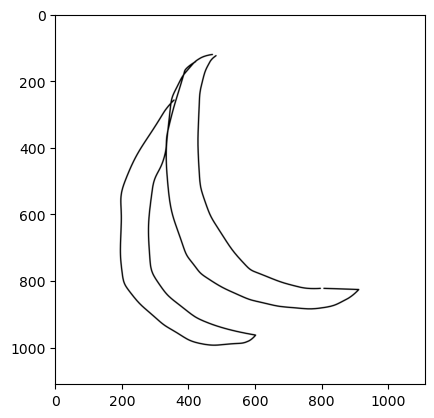

In [2]:
def load_images_from_folder(root_folder):
    images = []
    labels = []
    
    for class_folder in os.listdir(root_folder):
        class_folder_path = os.path.join(root_folder, class_folder)
        if os.path.isdir(class_folder_path):
            for image_name in os.listdir(class_folder_path):
                image_path = os.path.join(class_folder_path, image_name)
                try:
                    img = mpimg.imread(image_path)
                    #plt.imshow(img, cmap='gray')
                    img_array = np.array(img)
                    images.append(img_array)
                    labels.append(class_folder)  # Use folder name as label
                except Exception as e:
                    print(f"Error loading image {image_path}: {str(e)}")

    return np.array(images), np.array(labels)
    
data = load_images_from_folder("data")

In [7]:
def shuffle_data(data):
    images, labels = data
    
    indices = np.random.permutation(len(images))
    images = images[indices]
    labels = labels[indices]
    
    return images, labels

images, labels = shuffle_data(data)
labels

array(['banana', 'apple', 'apple', 'banana', 'apple', 'apple', 'apple',
       'apple', 'banana', 'apple', 'apple', 'apple', 'banana', 'banana',
       'apple', 'apple', 'banana', 'apple', 'apple', 'apple', 'banana',
       'banana', 'banana', 'banana', 'apple', 'banana', 'banana',
       'banana', 'apple', 'apple', 'banana', 'apple', 'banana', 'banana',
       'banana', 'apple', 'apple', 'apple', 'banana', 'apple', 'banana',
       'banana', 'apple', 'banana', 'apple', 'apple', 'banana', 'banana',
       'banana', 'banana', 'banana', 'banana', 'banana', 'apple', 'apple',
       'banana', 'apple', 'apple', 'banana', 'apple', 'apple', 'banana',
       'apple', 'banana', 'apple', 'apple', 'banana', 'banana', 'apple',
       'apple', 'banana', 'apple', 'apple', 'banana', 'banana', 'apple',
       'banana', 'apple', 'apple', 'banana', 'banana', 'apple', 'apple',
       'banana', 'banana', 'banana', 'apple', 'apple', 'banana', 'banana',
       'apple', 'apple', 'banana', 'banana', 'apple', 